In [110]:
import yfinance as yf
from ta import add_all_ta_features
import matplotlib.pyplot as plt
import numpy as np

In [111]:
data = yf.download("ETH-USD", period="60d", interval = "30m")
data.columns = [x.lower() for x in data.columns]
data = add_all_ta_features(data, "open", "high", "low", "close", "volume")
# replace np.inf with np.nan
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)
data.head()

[*********************100%***********************]  1 of 1 completed


/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


,open,high,low,close,adj close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-08 00:00:00+00:00,3143.008545,3150.466797,3124.458984,3134.179688,3134.179688,31468544,-7.945122e+06,31468544,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.807625,0.000000,0.000000
2022-02-08 00:30:00+00:00,3134.238770,3138.015381,3131.182861,3131.182861,3131.182861,42137600,-5.008272e+07,-10669056,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.095618,-0.095663,-0.095618
2022-02-08 01:00:00+00:00,3131.493652,3142.607178,3131.417236,3142.607178,3142.607178,51537920,1.455198e+06,40868864,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364856,0.364192,0.268890
2022-02-08 01:30:00+00:00,3143.042480,3152.609375,3143.042480,3151.862549,3151.862549,58978304,5.122539e+07,99847168,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294513,0.294080,0.564194
2022-02-08 02:00:00+00:00,3152.025879,3153.858887,3144.713623,3148.336182,3148.336182,72237056,3.621642e+07,27610112,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.111882,-0.111945,0.451681


In [112]:
data["pctchange"] = data["close"].pct_change()
data["pricedirection"] = np.sign(data["pctchange"])
# data["target"] = data["pctchange"].shift(-1)

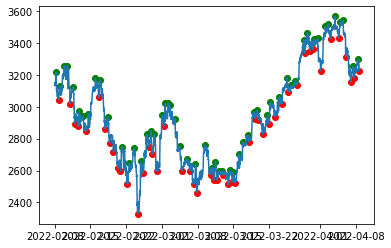

In [113]:
from scipy.signal import argrelextrema
# Find local peaks
n = 20  # number of points to be checked before and after

data['minextrema'] = data.iloc[argrelextrema(data.close.values, np.less_equal,
                    order=n)[0]]['close']
data['maxextrema'] = data.iloc[argrelextrema(data.close.values, np.greater_equal,
                    order=n)[0]]['close']

# Plot results

plt.scatter(data.index, data['minextrema'], c='r')
plt.scatter(data.index, data['maxextrema'], c='g')
plt.plot(data.index, data['close'])
plt.show()

In [114]:
# now we label the target accordingly
direction = None
data["target"] = None
tmp = []
for i in range(len(data)):
    if data.iloc[i]['minextrema'] == data.iloc[i]['close']:
        # now up
        direction = 1
    elif data.iloc[i]['maxextrema'] == data.iloc[i]['close']:
        # now down
        direction = -1
    
    tmp.append(direction)
data["target"] = tmp
# fill the first points
data = data.fillna(method="bfill")
data.head()

,open,high,low,close,adj close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,pctchange,pricedirection,minextrema,maxextrema,target
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-08 00:00:00+00:00,3143.008545,3150.466797,3124.458984,3134.179688,3134.179688,31468544,-7.945122e+06,31468544,0.0,0.0,...,0.0,0.0,6.807625,0.000000,0.000000,-0.000956,-1.0,3043.053223,3217.155518,-1.0
2022-02-08 00:30:00+00:00,3134.238770,3138.015381,3131.182861,3131.182861,3131.182861,42137600,-5.008272e+07,-10669056,0.0,0.0,...,0.0,0.0,-0.095618,-0.095663,-0.095618,-0.000956,-1.0,3043.053223,3217.155518,-1.0
2022-02-08 01:00:00+00:00,3131.493652,3142.607178,3131.417236,3142.607178,3142.607178,51537920,1.455198e+06,40868864,0.0,0.0,...,0.0,0.0,0.364856,0.364192,0.268890,0.003649,1.0,3043.053223,3217.155518,-1.0
2022-02-08 01:30:00+00:00,3143.042480,3152.609375,3143.042480,3151.862549,3151.862549,58978304,5.122539e+07,99847168,0.0,0.0,...,0.0,0.0,0.294513,0.294080,0.564194,0.002945,1.0,3043.053223,3217.155518,-1.0
2022-02-08 02:00:00+00:00,3152.025879,3153.858887,3144.713623,3148.336182,3148.336182,72237056,3.621642e+07,27610112,0.0,0.0,...,0.0,0.0,-0.111882,-0.111945,0.451681,-0.001119,-1.0,3043.053223,3217.155518,-1.0


# first check how much $$$ we can make

In [115]:
startMoney = 10000
COMMISSION = 0.00025
nrstocks = 0
boughtAt = 0
money = startMoney
trades = []
portfolio = []

justHoldStocks = startMoney / data.iloc[0]['close']
for i in range(len(data)):
    crntPrice = data.iloc[i]['close']
    if data.iloc[i]['target'] == 1 and nrstocks == 0:
        # buy
        amount = money / crntPrice * .95
        cost = amount * crntPrice * (1 + COMMISSION)
        money -= cost
        nrstocks += amount
        boughtAt = cost
    elif data.iloc[i]['target'] == -1 and nrstocks > 0:
        # sell
        win = nrstocks * crntPrice * (1 - COMMISSION)
        money += win
        nrstocks = 0
        trades.append(win - boughtAt)
    portfolio.append(money + nrstocks * crntPrice)
# last day sell all
if nrstocks > 0:
    win = nrstocks * crntPrice * (1 - COMMISSION)
    money += win
    nrstocks = 0
    trades.append(win - boughtAt)

justHoldWin = justHoldStocks * data.iloc[-1]['close']

print(f'result is: {money}$ win, average trade is {np.mean(trades)}$, median trade is {np.median(trades)}$ justHoldWin is {justHoldWin}$, nr trades is {len(trades)}')

# calculate it down to days
# we have days, sooo...
# winPerDay = money / len(data)
winPerDay = money / (len(data) / 60 ) # 6.5hourly data
winPerMonth = winPerDay * 30
winPctPerMonth = winPerMonth / startMoney * 100
print(f'win per day is {winPerDay}$, win per month is {winPerMonth}$, win pct per month is {winPctPerMonth}% or {winPctPerMonth * 12}% per year')

# aapl 5 min 1.2k pct per year
# aapl 30 min 4.6k pct per year

result is: 47077.07478942967$ win, average trade is 950.6942253699916$, median trade is 696.2489207522067$ justHoldWin is 10503.488969900916$, nr trades is 39
win per day is 986.5960486782327$, win per month is 29597.88146034698$, win pct per month is 295.9788146034698% or 3551.7457752416376% per year


In [116]:
from sklearn.model_selection import train_test_split
Y = data["target"]
X = data.drop(["target", "minextrema", "maxextrema"], axis=1)
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.322, shuffle = True)

In [117]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

clf = make_pipeline(StandardScaler(), SGDClassifier())
clf.fit(x_train, y_train)
scr = clf.score(x_test, y_test)
pred = clf.predict(x_test)

print(classification_report(y_test, pred, target_names=["sell", "buy"]))

              precision    recall  f1-score   support

        sell       0.70      0.76      0.73       469
         buy       0.73      0.66      0.69       453

    accuracy                           0.71       922
   macro avg       0.71      0.71      0.71       922
weighted avg       0.71      0.71      0.71       922



## feature selection

In [118]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(k=20).fit(x_train, y_train)
cols = selector.get_support(indices=True)
print(data.columns[cols])

Index(['volatility_kcp', 'volatility_kchi', 'trend_macd_signal',
       'trend_macd_diff', 'trend_trix', 'trend_kst', 'trend_kst_sig',
       'trend_kst_diff', 'trend_stc', 'trend_psar_up', 'trend_psar_down',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d',
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ppo_signal', 'momentum_ppo_hist'],
      dtype='object')


## xgb classifier

[17:18:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jguese/miniconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jguese/miniconda3/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

        sell       0.94      0.96      0.95       469
         buy       0.96      0.94      0.95       453

    accuracy                           0.95       922
   macro avg       0.95      0.95      0.95       922
weighted avg       0.95      0.95      0.95       922



/home/jguese/miniconda3/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

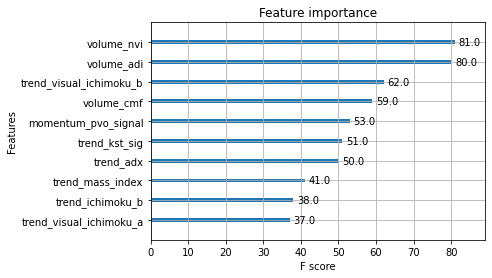

In [119]:
from xgboost import XGBClassifier, plot_importance

clf = XGBClassifier()
clf.fit(x_train, y_train)
scr = clf.score(x_test, y_test)
pred = clf.predict(x_test)

print(classification_report(y_test, pred, target_names=["sell", "buy"]))

plot_importance(clf, max_num_features=10)


In [120]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
results = zip(keys, values)
results = sorted(results, key=lambda x: x[1], reverse=True)
results

[('volume_nvi', 81.0),
 ('volume_adi', 80.0),
 ('trend_visual_ichimoku_b', 62.0),
 ('volume_cmf', 59.0),
 ('momentum_pvo_signal', 53.0),
 ('trend_kst_sig', 51.0),
 ('trend_adx', 50.0),
 ('trend_mass_index', 41.0),
 ('trend_ichimoku_b', 38.0),
 ('volatility_atr', 37.0),
 ('trend_visual_ichimoku_a', 37.0),
 ('momentum_pvo_hist', 36.0),
 ('volatility_dch', 32.0),
 ('volatility_kcw', 31.0),
 ('volatility_dcw', 31.0),
 ('volume_obv', 29.0),
 ('trend_dpo', 29.0),
 ('volume_sma_em', 28.0),
 ('volatility_ui', 28.0),
 ('trend_ichimoku_base', 28.0),
 ('momentum_tsi', 28.0),
 ('momentum_kama', 28.0),
 ('trend_aroon_ind', 27.0),
 ('volatility_bbw', 25.0),
 ('trend_stc', 25.0),
 ('trend_adx_neg', 25.0),
 ('volume_mfi', 23.0),
 ('volatility_dcl', 23.0),
 ('trend_trix', 20.0),
 ('momentum_stoch_rsi', 19.0),
 ('momentum_stoch_rsi_k', 19.0),
 ('momentum_uo', 19.0),
 ('volume', 18.0),
 ('volatility_dcp', 18.0),
 ('trend_kst_diff', 18.0),
 ('momentum_ppo_signal', 18.0),
 ('volatility_bbh', 17.0),
 ('tren

### calculate win again with prediction

In [121]:
clf.fit(X, Y)
predictions = clf.predict(X)
print(classification_report(Y, predictions, target_names=["sell", "buy"]))

/home/jguese/miniconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jguese/miniconda3/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:18:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        sell       1.00      1.00      1.00      1496
         buy       1.00      1.00      1.00      1367

    accuracy                           1.00      2863
   macro avg       1.00      1.00      1.00      2863
weighted avg       1.00      1.00      1.00      2863

